In [1]:
from keras.datasets import mnist

In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

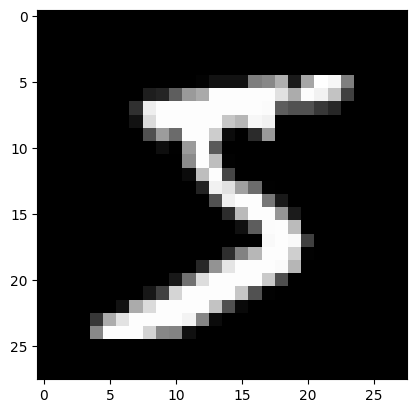

In [4]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')
plt.show()

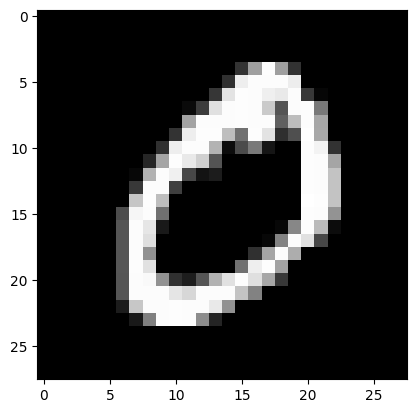

In [5]:
plt.imshow(xtrain[1], cmap='gray')
plt.show()

In [6]:
import seaborn as sns

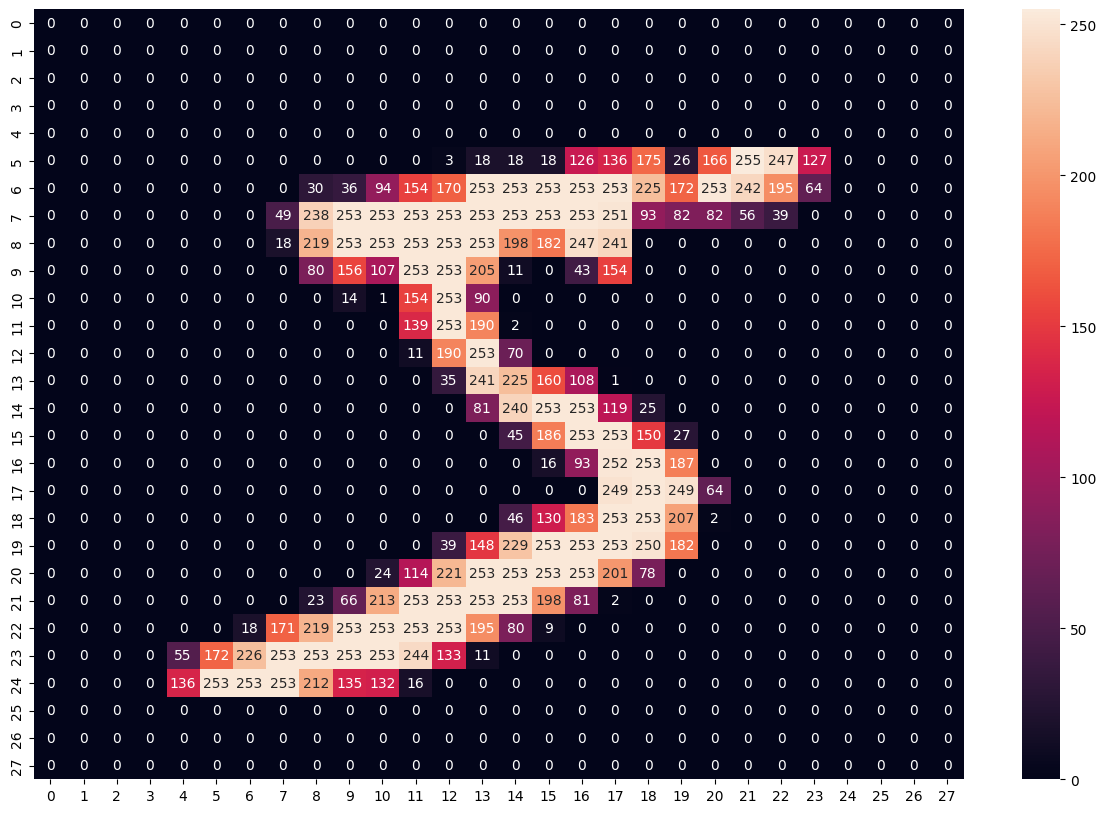

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(xtrain[0], annot=True, fmt='d')
plt.show()

In [8]:
# first 9 images from train data

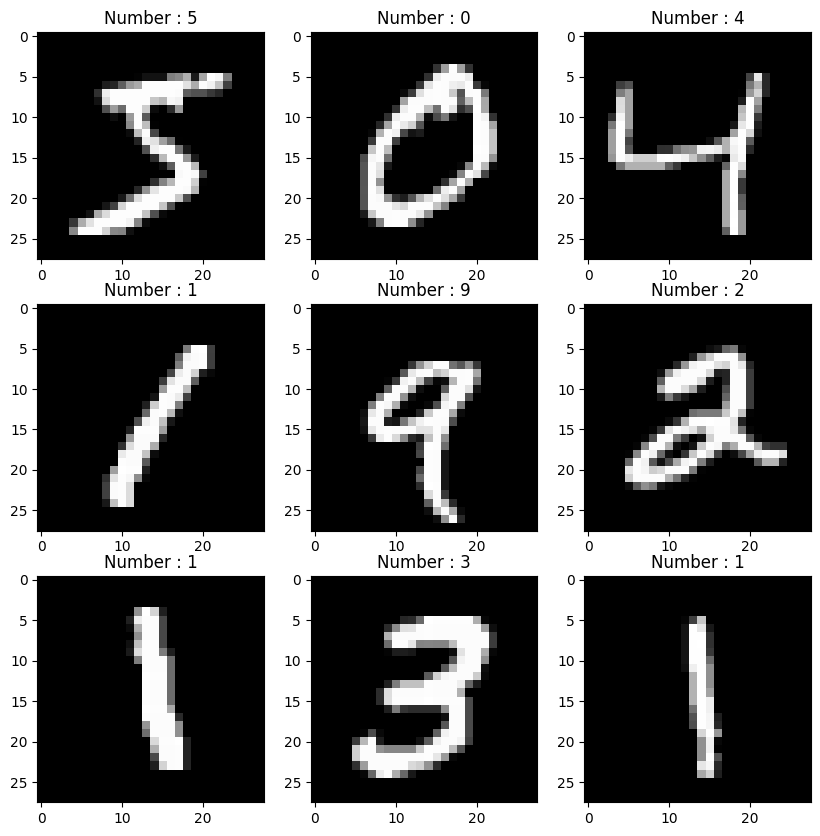

In [9]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f'Number : {ytrain[i]}')


In [10]:
# Preprocessing the data

In [11]:
xtrain_scl=xtrain.astype('float32')/255
xtest_scl=xtest.astype('float32')/255

In [12]:
# check unique values from output training data

In [13]:
import numpy as np

In [14]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat  = to_categorical(ytest)

In [16]:
ytrain_cat[0:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
ytrain[:3]

array([5, 0, 4], dtype=uint8)

In [18]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPool2D,Flatten,Dropout,Dense

In [19]:
model=Sequential()

In [20]:
model.add(Input(shape=(28,28,1)))

In [21]:
model.add(Convolution2D(filters=32,activation='relu',kernel_size=(3,3)))

In [22]:
model.add(MaxPool2D(pool_size=(2,2)))

In [23]:
model.add(Convolution2D(filters=64, activation='relu',kernel_size=(3,3)))

In [24]:
model.add(MaxPool2D(pool_size=(2,2)))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dropout(0.5))

In [27]:
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax'))

In [28]:
# complie and fit the model

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
hist=model.fit(xtrain,ytrain_cat,validation_split=0.2, epochs=15)

Epoch 1/15
1500/1500 [==============================] - 12s 5ms/step - loss: 0.6530 - accuracy: 0.8819 - val_loss: 0.0901 - val_accuracy: 0.9716
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1628 - accuracy: 0.9516 - val_loss: 0.0634 - val_accuracy: 0.9811
Epoch 3/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1317 - accuracy: 0.9601 - val_loss: 0.0579 - val_accuracy: 0.9827
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1123 - accuracy: 0.9662 - val_loss: 0.0528 - val_accuracy: 0.9847
Epoch 5/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1048 - accuracy: 0.9687 - val_loss: 0.0547 - val_accuracy: 0.9847
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0939 - accuracy: 0.9726 - val_loss: 0.0448 - val_accuracy: 0.9870
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0850 - accuracy: 0.9739 - val_loss: 0.0495 - val_accuracy

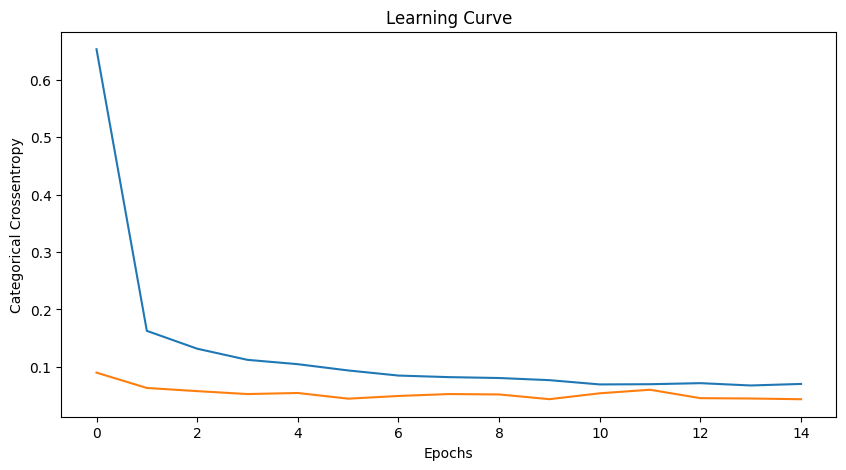

In [31]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.show()

In [ ]:
# model evalution

In [32]:
model.evaluate(xtrain,ytrain_cat)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0259 - accuracy: 0.9919


[0.02590838074684143, 0.9918666481971741]

In [ ]:
# predict probabilities for traning and testing

In [33]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

313/313 [==============================] - 1s 3ms/step


In [34]:
yprob_train[:5]

array([[9.03678132e-10, 2.51253685e-10, 1.52491986e-09, 1.95246097e-03,
        2.53097630e-11, 9.97971594e-01, 1.07406994e-09, 3.24395977e-08,
        2.28130866e-05, 5.31214937e-05],
       [9.99999046e-01, 3.02487771e-13, 3.76912027e-07, 3.83886152e-11,
        4.28959021e-11, 8.51719972e-10, 4.62601832e-07, 2.42665974e-11,
        7.23983007e-08, 4.03066380e-08],
       [3.28129940e-10, 1.73061166e-03, 3.40020212e-09, 1.35591649e-09,
        9.98205543e-01, 1.76635510e-07, 3.56099661e-09, 5.99885025e-05,
        2.78784273e-06, 8.51029256e-07],
       [3.34519440e-10, 9.99993086e-01, 4.11399043e-07, 1.25301228e-11,
        6.54421228e-07, 4.75600080e-11, 1.27159865e-08, 4.19425714e-06,
        1.64375467e-06, 1.84032096e-08],
       [3.78527626e-10, 4.73466448e-12, 7.80397275e-11, 9.46585380e-11,
        6.26178598e-06, 2.51123761e-10, 4.61260891e-12, 9.56113198e-08,
        3.12611628e-05, 9.99962449e-01]], dtype=float32)

In [ ]:
# final predictions

In [35]:
ypred_train = np.argmax(yprob_train,axis=1)
ypred_test= np.argmax(yprob_test,axis=1)

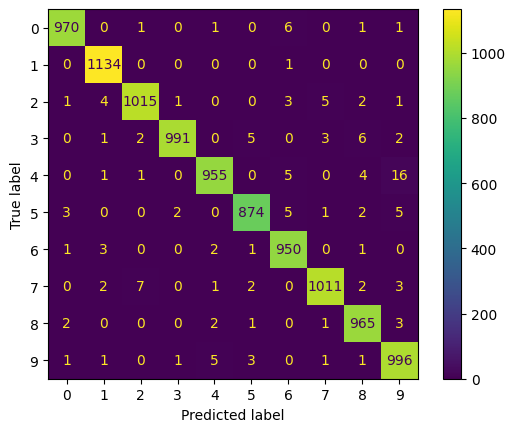

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_test)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

In [ ]:
# END